# Data mining Class 660 Challenge

* Name: Kale Aniket Devidas
* Class: Data Mining
* Email: ak665246@sju.edu    
* Prof: Joseph Davis    

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
data = pd.read_csv("conversion_data.csv")

In [2]:
data.shape

(316200, 6)

In [3]:
data.dtypes

country                object
age                     int64
new_user                int64
source                 object
total_pages_visited     int64
converted               int64
dtype: object

In [4]:
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [5]:
data.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [6]:
data.converted.value_counts()

0    306000
1     10200
Name: converted, dtype: int64

* So we have total numbers of converted(10200) and non converted sessions(306000)

In [7]:
# This is good news for us. we dont have any missing values in datasets.
data.isnull().sum()

country                0
age                    0
new_user               0
source                 0
total_pages_visited    0
converted              0
dtype: int64

In [8]:
data.corr()["converted"]

age                   -0.088797
new_user              -0.152374
total_pages_visited    0.528994
converted              1.000000
Name: converted, dtype: float64

* As per the correlation Test: total_pages_visited more significant to the output.

In [9]:
data.country.value_counts()

US         178092
China       76602
UK          48450
Germany     13056
Name: country, dtype: int64

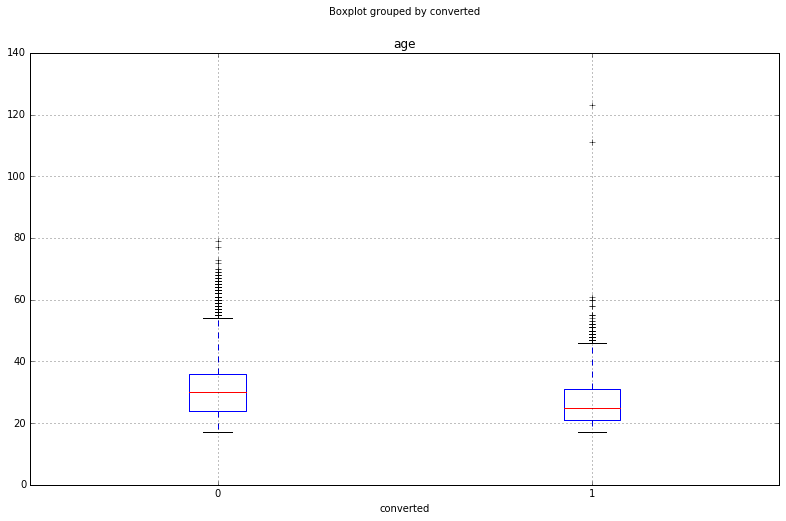

In [10]:
data.boxplot(column = "age", by = "converted", figsize=(13,8))

* we can see the distrubution of Age interms of conversion rate.
* Most of the non conversion rate of Age in between 60 to 80 Years

In [11]:
# Null Accuaracy:
data.converted.value_counts().head(1)/data.converted.shape

0    0.967742
Name: converted, dtype: float64

* our modul predicts 96 percent the non converted values. 
* our bench mark or null accuracy is close to 96 percent.

# we will split Train and Test datasets.

* We will declare feature columns X and y

In [12]:
feat_cols = ["age", "new_user", "total_pages_visited"]

In [13]:
X = data[feat_cols]
y = data.converted

In [14]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)
print(X_train.shape)
print(y_test.shape)

(237150, 3)
(79050,)


In [15]:
# We will used classification module
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [16]:
y_pred = knn.predict(X_test)

In [17]:
metrics.accuracy_score(y_test, y_pred)

0.98318785578747625

In [18]:
metrics.confusion_matrix(y_test, y_pred)

array([[76038,   462],
       [  867,  1683]])

# False positive 462 incorrectly classified as converted
# False Negative 867 incorrectly classified as non converted.
# True positive 1683 correctly classified as converted
# True Negative 76038 correctly classified as non converted

* Conclusion : Our biggest problem are 462 sessions we have predicted as converted 
* butactually its a non converted sessions


In [19]:
y_pred_prob = knn.predict_proba(X_test)[:,1]

In [20]:
pred_prob = pd.DataFrame({"Pred_proba": y_pred_prob})

* So no used of predicted probability in our case. because our NULL accuracy is 96 percent
* Null Accuracy means most often class is (non conversion class 0).


In [21]:
data["five_more_pages"] = (data.total_pages_visited >= 5).astype(int)

In [22]:
data.head()  

,country,age,new_user,source,total_pages_visited,converted,five_more_pages
0,UK,25,1,Ads,1,0,0
1,US,23,1,Seo,5,0,1
2,US,28,1,Seo,4,0,0
3,China,39,1,Seo,5,0,1
4,US,30,1,Seo,6,0,1


In [23]:
feat_cols = ["age", "new_user", "total_pages_visited", "five_more_pages"]
X = data[feat_cols]
y = data.converted

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)
print(X_train.shape)
print(y_test.shape)

(237150, 4)
(79050,)


In [25]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [26]:
y_pred_class = knn.predict(X_test)

In [27]:
metrics.accuracy_score(y_test,y_pred_class)

0.98318785578747625

In [28]:
# Same Accuracy as Expected. we already feed the same data to our module.

* Conclusion:
* Our Null Accuracy(Most often class) = 96 Percent that means our Module should have to get more accuracy than this
* 462 sessions are False positives, we have to reduce this number
* As per graphs , Age group from 60-80, we dont have more conversion seesions.
* Knn module our accuracy is 98 Percent.

In [29]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [30]:
y_pred_class =  nb.predict(X_test)

In [31]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[74801,  1699],
       [  511,  2039]])

* We are interested in FP only 1699. we want to reduce 1699 sessions.
* False Positive Rate 1699

In [32]:
metrics.accuracy_score(y_test,y_pred_class)

0.97204301075268817

* Our Accuracy went down with this Module.

In [33]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [34]:
metrics.accuracy_score(y_test, y_pred_class)

0.97204301075268817

In [35]:
metrics.confusion_matrix(y_test, y_pred)

array([[76038,   462],
       [  867,  1683]])

* Our Accuracy went down from 98 Percent to 97 

# Conclusion:
* Naive Bayes module Accuracy is 97 percent but the False postive rate is higher (1699) than other modules.
* our best Module Kmeans classification with n = 5, our Accuracy is 98 Percent.
* Logistic regreesion Module Accuracy is 97 Percent and False Positive rate is 420 same as Knn.
* so If we considered the False Postive rate and Accuracy, we are going to select Knn Module.